<a href="https://colab.research.google.com/github/KhalinaA/Digital_Image_Processing/blob/main/PR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install imageai numpy opencv-python torchvision matplotlib torch
from google.colab import drive
drive.mount('/content/hw4', force_remount=True)

Mounted at /content/hw4


# Добавляем в проект исходное изображение:

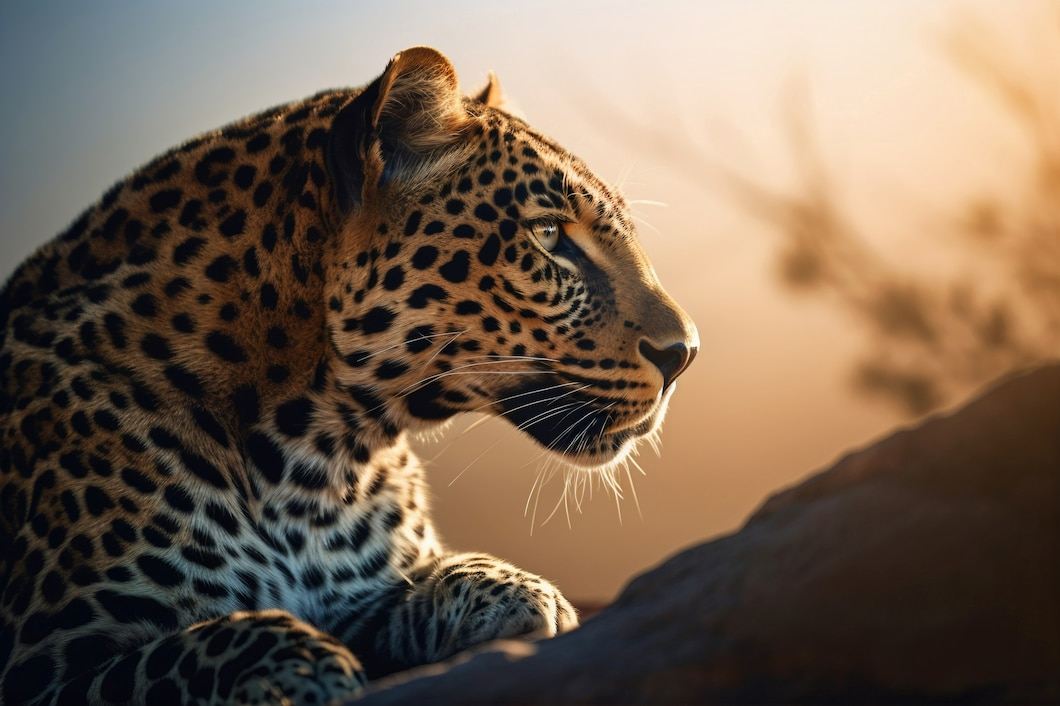

In [17]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from urllib.request import urlopen
req = urlopen('https://img.freepik.com/free-photo/view-of-wild-leopard-in-nature_23-2150460923.jpg?w=1060&t=st=1703588003~exp=1703588603~hmac=81acd0ecb219e6e091c3561a17768f0fae987939e58cecabb8bae157b24124ce') # используя метод urlopen, получаем объект запроса по ссылке (изображение)
                                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"

image_2 = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_2 = cv2.imdecode(image_2, -1) # декодируем изображение в привычный для отображения формат

cv2_imshow(image_2) # Выводим изображение, используя метод cv2_imshow()


# Пример №1. Детекция

[Техническая документация](https://imageai.readthedocs.io/en/latest/detection/index.html)

[{'name': 'giraffe', 'percentage_probability': 97.31, 'box_points': [0, 48, 699, 696]}]


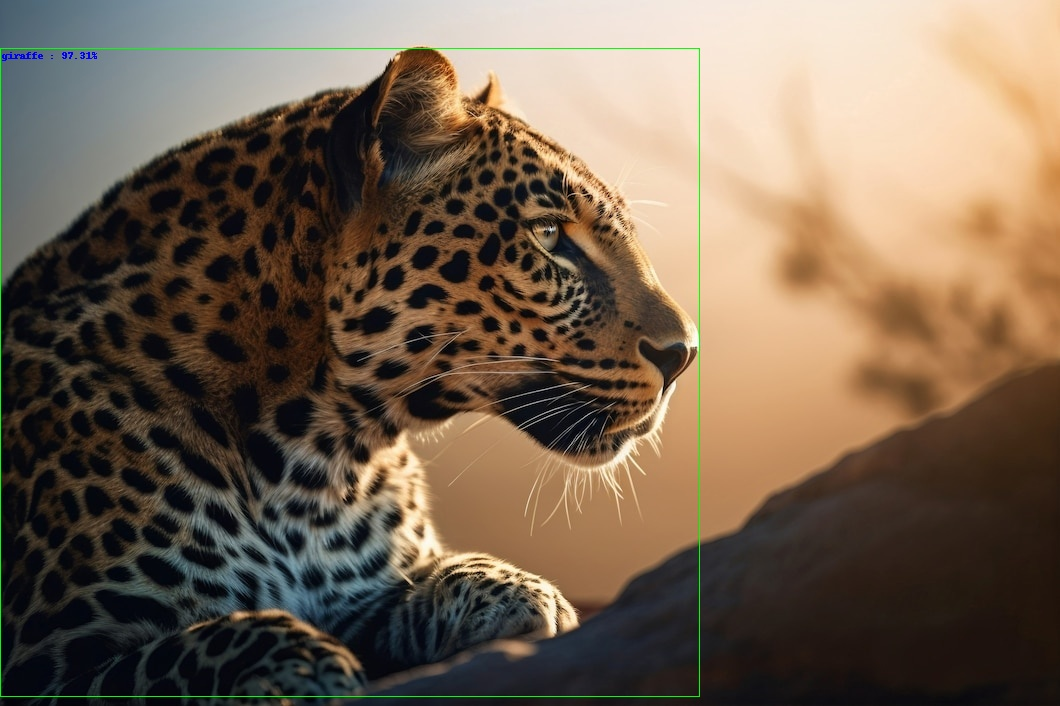

In [20]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)

detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsRetinaNet() # обращаемся к методу setModelTypeAsRetinaNet, тем самым устанавливая для использования в проекте модель RetinaNet для распознавания объектов
detector.setModelPath("/content/hw4/MyDrive/package_for_python_task4/Копия retinanet.pth") # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel() # загружаем модель

image_path = os.path.join(exec_path, "new_objects.jpg")

list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=image_2, # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=image_path, # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=60, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread(image_path)
cv2_imshow(output_image)


# Пример №2. Классификация

[Техническая документация](https://imageai.readthedocs.io/en/latest/prediction/index.html)

In [21]:
from imageai.Classification import ImageClassification
import os

/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [23]:
execution_path = "/content/hw4/MyDrive/package_for_python_task4/Копия resnet50.pth"

prediction = ImageClassification()
prediction.setModelTypeAsResNet50()
prediction.setModelPath(execution_path)
prediction.loadModel()

predictions, probabilities = prediction.classifyImage((image_2), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

leopard  :  93.5222
jaguar  :  5.9597
snow leopard  :  0.3033
cheetah  :  0.0605
puffer  :  0.037
Egyptian cat  :  0.0236
tiger cat  :  0.0137
tiger  :  0.0096
cougar  :  0.0053
eel  :  0.0033


# Задание №1. Детекция объектов на изображении

1.1. Перейдите по ссылке из примера №1

1.2. Загрузите готовую модель для детекции объектов на изображении, отличную от той, что представлена в примере

1.3. Используя данную модель, обработе 5 изображений с больши набором объектов, которые относятся к разным классам

1.4. Визуализируйте полученные результаты

Результаты для 1.jpg:
person  :  100.0  :  [436, 24, 976, 800]
person  :  99.95  :  [245, 679, 376, 796]
person  :  99.89  :  [159, 713, 237, 800]
person  :  99.99  :  [461, 743, 519, 800]
person  :  99.97  :  [0, 713, 57, 800]
person  :  99.97  :  [71, 683, 134, 790]
person  :  99.99  :  [372, 728, 426, 800]
Результаты для 3.jpg:
person  :  100.0  :  [574, 109, 1838, 1547]
person  :  99.99  :  [0, 639, 376, 1547]
person  :  99.99  :  [572, 730, 1014, 1547]
person  :  99.91  :  [2314, 880, 2537, 1547]
Результаты для 2.jpg:
person  :  99.15  :  [41, 106, 705, 445]
Результаты для 4.jpeg:
person  :  99.98  :  [484, 140, 1024, 629]
person  :  99.91  :  [0, 9, 755, 633]
baseball glove  :  96.09  :  [512, 225, 773, 451]
Результаты для 5.jpg:
person  :  93.82  :  [195, 45, 1200, 606]
skateboard  :  62.48  :  [119, 221, 1200, 584]


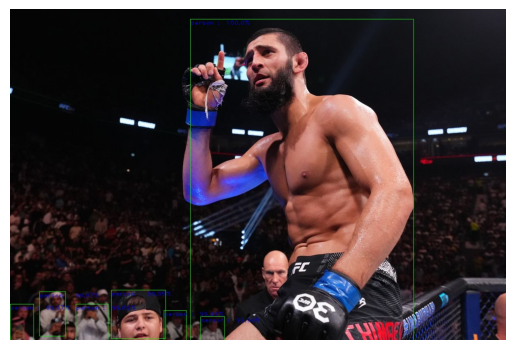

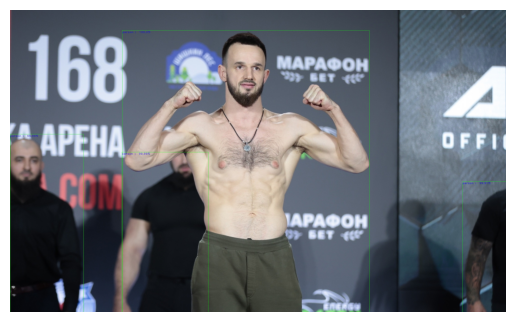

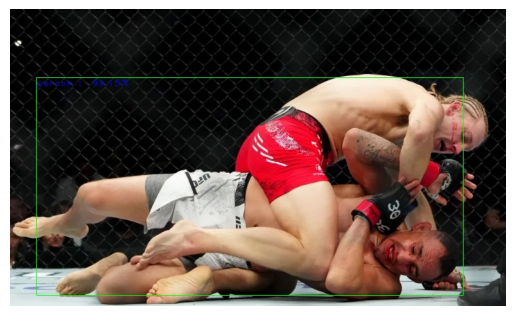

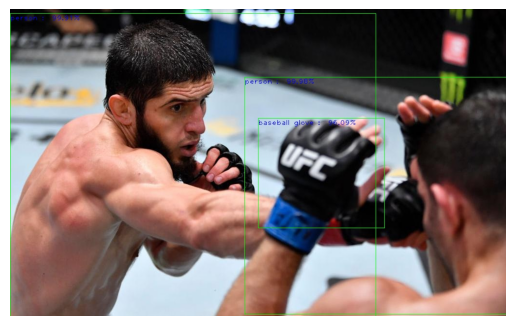

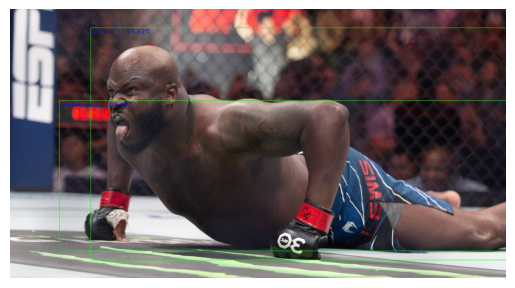

In [33]:
from imageai.Detection import ObjectDetection
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('/content/hw4/MyDrive/package_for_python_task4/Копия yolov3.pt')
detector.loadModel()

new_image_directory = "./new_img_for_python/"
if (not os.path.isdir(new_image_directory)):
    os.mkdir(new_image_directory)
video_directory = "/content/hw4/MyDrive/package_for_python_task4/pict/"
video_file = [f for f in os.listdir(video_directory)]

for image_path in video_file:
    detections = detector.detectObjectsFromImage(input_image=video_directory+image_path, output_image_path=f"{new_image_directory}new_{image_path}")

    print(f"Результаты для {image_path}:")
    for detection in detections:
        print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])


for image_path in video_file:
    output_image_path = f"{new_image_directory}new_{image_path}"
    img = mpimg.imread(output_image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()



# Задание №2. Классификация изображений

2.1. Перейдите по ссылке из примера №2

2.2. Загрузите готовую модель для классификации изображений, отличную от той, что представлена в примере

2.3. Используя данную модель, обработе 5 изображений, которые относятся к разным классам

2.4. Сохраните полученные предсказания используемой модели

In [35]:
from imageai.Classification import ImageClassification
import os

model_path = '/content/hw4/MyDrive/package_for_python_task4/Копия inception_v3.pth'

classifier = ImageClassification()
classifier.setModelTypeAsInceptionV3()
classifier.setModelPath(model_path)
classifier.loadModel()

video_directory = "/content/hw4/MyDrive/package_for_python_task4/pict/"
video_file = [video_directory + f for f in os.listdir(video_directory)]

predictions_list = []

for image_file in video_file:
    predictions, probabilities = classifier.classifyImage(image_file, result_count=1)
    prediction = {"image_file": image_file, "class": predictions[0], "probability": probabilities[0]}
    predictions_list.append(prediction)


with open("predictions.txt", 'w',  encoding="utf-8") as f:
    for prediction in predictions_list:
        print(f"Изображение: {prediction['image_file']}")
        print(f"Класс: {prediction['class']}")
        print(f"Вероятность: {prediction['probability']:.2%}")
        print()

        f.write(f"Изображение: {prediction['image_file']}\n")
        f.write(f"Класс: {prediction['class']}\n")
        f.write(f"Вероятность: {prediction['probability']:.2%}\n\n")

Изображение: /content/hw4/MyDrive/package_for_python_task4/pict/1.jpg
Класс: water bottle
Вероятность: 9781.16%

Изображение: /content/hw4/MyDrive/package_for_python_task4/pict/3.jpg
Класс: bathing cap
Вероятность: 9237.11%

Изображение: /content/hw4/MyDrive/package_for_python_task4/pict/2.jpg
Класс: racket
Вероятность: 8893.83%

Изображение: /content/hw4/MyDrive/package_for_python_task4/pict/4.jpeg
Класс: punching bag
Вероятность: 4367.94%

Изображение: /content/hw4/MyDrive/package_for_python_task4/pict/5.jpg
Класс: swimming trunks
Вероятность: 5590.15%



# Задание №3. Детекция и трекинг объектов на видеопотоке

## 3.1. Подготовка набора данных:

* Найдите и загрузите из сети Интернет 5 видеофайлов с большим количеством разнородных объектов в кадре (например запись с камеры видеонаблюдения на шоссе и тд) длительностью от 30 секунд до 1 минуты (Также Вы можете скачать видеофайл большей длительности, а затем обрезать его в одном из [онлйан-сервисов](https://online-video-cutter.com/ru/?ysclid=lfjb8zk8er484677266).


* Для более оптимальной работы с видеофайлами, сожмите их, используя онлайн-сервисы. ([Например тут](https://compress-video-online.com/ru/ ))

## 3.2. Детекция и трекинг объектов на видеопотоке

3.2.1. [Ознакомьтесь с технической документацией](https://imageai.readthedocs.io/en/latest/video/index.html)

3.2.2. Загрузите готовую модель для детекции объектов

3.2.3. Используя данную модель, обработайте 5 видеофайлов (см. п. 3.1.)

3.2.4. Сохраните полученные видеофайлы

In [2]:
from imageai.Detection import VideoObjectDetection
import os
import torch

detector = VideoObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath('/content/hw4/MyDrive/package_for_python_task4/Копия tiny-yolov3.pt')
detector.loadModel()

video_directory = "/content/hw4/MyDrive/package_for_python_task4/video/"
video_files = [video_directory + f for f in os.listdir(video_directory)]
output_video_paths = []

output_video_directory = "/content/hw4/MyDrive/package_for_python_task4/output_video/"

for video_path in video_files:
    output_video_file = f"{output_video_directory}output_{os.path.basename(video_path)}"

    detections = detector.detectObjectsFromVideo(
        input_file_path=video_path,
        output_file_path=output_video_file,
        frames_per_second=20,
        log_progress=True
    )

    print(f"Обработано: {video_path}\n Сохранено: {output_video_file}")
    print(f"")
    print()

print("Сохраненные видеофайлы:")
for output_video_file in output_video_paths:
    print(output_video_file)


Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  